<a href="https://colab.research.google.com/github/ardaxz99/NLP-Models-and-Vectorization-Techniques/blob/main/NLP_Models_and_Vectorization_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **EDA and Cleaning**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


import os

import seaborn as sns
import re
import matplotlib.pyplot as plt
import missingno as ms
%matplotlib inline

import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
training_data = pd.read_csv('/content/drive/MyDrive/train_E6oV3lV.csv') #to read and store in panda dataframe
testing_data = pd.read_csv('/content/drive/MyDrive/test_tweets_anuFYb8.csv') #to read and store in panda dataframe

In [ ]:
print("Training Set:"% training_data.columns, training_data.shape)
print("Test Set:"% testing_data.columns, testing_data.shape)


Training Set: (31962, 3)
Test Set: (17197, 2)


In [ ]:
print('Train_Set -----')
print(training_data.isnull().sum())
print('Test_set -----')
print(testing_data.isnull().sum())
training_data.head()

Train_Set -----
id       0
label    0
tweet    0
dtype: int64
Test_set -----
id       0
tweet    0
dtype: int64


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
training_data['label'].value_counts() #count number of  positive and negative  tweet

0    29720
1     2242
Name: label, dtype: int64

**Cleaning**

In [ ]:
import re
from sklearn.utils import resample
import nltk
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

eng_stops = set(stopwords.words("english"))
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

def cleandata(review_text):
    # remove all the special characters
    new_review_text = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", review_text) 
    # convert all letters to lower case
    words = new_review_text.lower().split()
    # remove stop words
    words = [w for w in words if not w in eng_stops]    
    # lemmatizer
    words = [lemmatizer.lemmatize(word) for word in words]
    # join all words back to text
    return (" ".join(words))

training_data['clean_tweet']=training_data['tweet'].apply(lambda x: cleandata(x))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
training_data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


**EDA**

In [ ]:
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

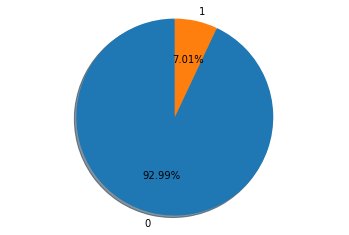

In [ ]:
createPieChartFor(training_data.label)


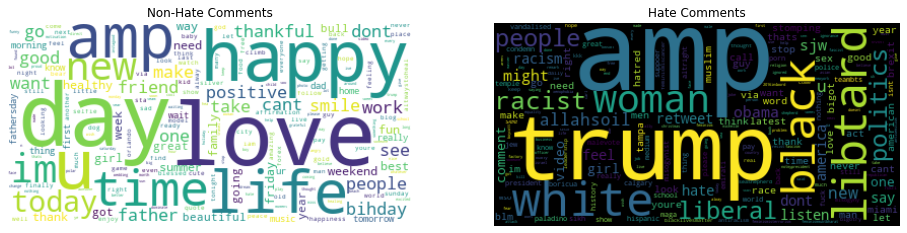

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(training_data['clean_tweet'][training_data.label == 0])
text_neg = " ".join(training_data['clean_tweet'][training_data.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

# **Data Imbalance Handling**

**Upsample**

In [ ]:
count_non_hate = training_data[training_data['label'] == 0]['clean_tweet'].count()
df_hate_speech = training_data[training_data['label'] == 1]
df_non_hate_speech = training_data[training_data['label'] == 0]
df_hate_speech_oversample = df_hate_speech.sample(count_non_hate, replace=True)
training_data_oversampled = pd.concat([df_non_hate_speech, df_hate_speech_oversample], axis=0)

print('Random over-sampling:')
print(training_data_oversampled['label'].value_counts())

Random over-sampling:
0    29720
1    29720
Name: label, dtype: int64


In [ ]:
training_data_oversampled.shape[0]

59440

In [ ]:
training_data_oversampled.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,ComplementNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier,Lasso
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC,SVC,NuSVC

from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score

from sklearn.multiclass import OneVsRestClassifier




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 153 kB/s 


# **Text Classification with ML Models: LogisticRegression, MultinomialNB, DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier, XGBClassifier, Liner SVC, SVC, SGDClassifier, Bagging Classifier**

# **TF-IDF Vectorization**

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df =  train_test_split(training_data_oversampled, test_size = 0.2, random_state = 42)
vectorizer = TfidfVectorizer()
train_tfidf_model = vectorizer.fit_transform(train_df.clean_tweet)
test_tfidf_model = vectorizer.transform(test_df.clean_tweet)
train_tfidf = pd.DataFrame(train_tfidf_model)

In [ ]:
cls = [CatBoostClassifier(verbose=0),
    
       DecisionTreeClassifier(),

       MultinomialNB(), 
       ComplementNB(),
       BernoulliNB(),

       RandomForestClassifier(n_estimators=200),
       ExtraTreesClassifier(n_estimators=200),
       BaggingClassifier(n_estimators=20),
       AdaBoostClassifier(n_estimators=100),
       GradientBoostingClassifier(n_estimators=200),

       KNeighborsClassifier(),

       LogisticRegression(),
       LogisticRegression(C=1, penalty='l1', solver='liblinear'), #Lasso
       SGDClassifier(),

       XGBClassifier(random_state=22,learning_rate=0.9),
       
       LinearSVC(),
       OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', class_weight='balanced'), max_samples=1.0 / 10))
       ]

cls_name = []

lbl_actual = test_df.label
i = 0
accuracy = []
for cl in cls:
    model = cl.fit(train_tfidf_model,train_df.label)
    lbl_pred = model.predict(test_tfidf_model)
    a = (100*accuracy_score(lbl_pred, lbl_actual))
    a = round(a,2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, lbl_actual))
    i +=1

CatBoostClassifier  Accuracy Score : 97.04%
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5676
           1       0.99      0.96      0.97      6212

    accuracy                           0.97     11888
   macro avg       0.97      0.97      0.97     11888
weighted avg       0.97      0.97      0.97     11888

DecisionTreeClassifier  Accuracy Score : 95.21%
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      5311
           1       1.00      0.91      0.95      6577

    accuracy                           0.95     11888
   macro avg       0.95      0.96      0.95     11888
weighted avg       0.96      0.95      0.95     11888

MultinomialNB  Accuracy Score : 95.47%
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5506
           1       0.99      0.93      0.96      6382

    accuracy                           0.95     118

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

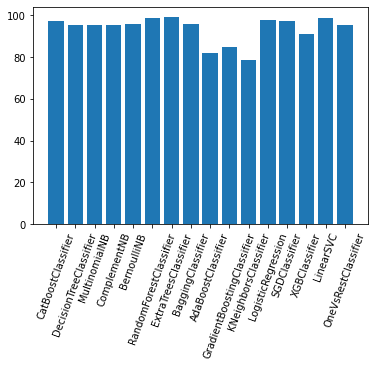

In [ ]:
plt.bar(cls_name, accuracy)
plt.xticks(rotation=70)

# **Word2Vec Vectorization (training from scratch)**

In [ ]:
!pip install gensim==4.1.2
import gensim
import nltk
nltk.download('punkt')
from gensim.models import Word2Vec,KeyedVectors

# gensim.models.Word2Vec func has sg=1 for skip gram sg=0 for cbow
# two methods for getting embeddings w2v_model = gensim.models.Word2Vec(X_train,vector_size=100,window=5,min_count=2) and 
# wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True) wv.init_sims(replace=True) normalization

training_data_oversampled['tokenized'] = training_data_oversampled['clean_tweet'].apply(lambda x: gensim.utils.simple_preprocess(x))
training_data_oversampled.head()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,id,label,tweet,clean_tweet,tokenized
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,"[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...,"[thanks, lyft, credit, cant, use, cause, dont,..."
2,3,0,bihday your majesty,bihday majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,"[model, love, take, time, ur]"
4,5,0,factsguide: society now #motivation,factsguide society motivation,"[factsguide, society, motivation]"


In [ ]:
X_train, X_test, y_train, y_test = train_test_split (training_data_oversampled['tokenized'], training_data_oversampled['label'] , test_size=0.2)

In [ ]:
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2,
                                   sg=1)

In [ ]:
words = set(w2v_model.wv.index_to_key )
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test])
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
cls = [XGBClassifier(random_state=22,learning_rate=0.9),
    
       CatBoostClassifier(verbose=0),
    
       DecisionTreeClassifier(),

       RandomForestClassifier(n_estimators=200),
       ExtraTreesClassifier(n_estimators=200),
       BaggingClassifier(n_estimators=20),
       AdaBoostClassifier(n_estimators=100),
       GradientBoostingClassifier(n_estimators=200),

       KNeighborsClassifier(),

       LogisticRegression(),
       LogisticRegression(C=1, penalty='l1', solver='liblinear'), #Lasso
       SGDClassifier(),

       
       
       LinearSVC(),
       OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', class_weight='balanced'), max_samples=1.0 / 10))
       ]

cls_name = []

lbl_actual = y_test
i = 0
accuracy = []
for cl in cls:
    if cl.__class__.__name__=="XGBClassifier":
      model = cl.fit(np.array(X_train_vect_avg),y_train.values.ravel())
      lbl_pred = model.predict(X_test_vect_avg)
      a = (100*accuracy_score(lbl_pred, lbl_actual))
      a = round(a,2)
      accuracy.append(a)
      cls_name.append(cl.__class__.__name__)
      print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
      print ( classification_report(lbl_pred, lbl_actual, digits=4))
      i +=1
    else:
      model = cl.fit(X_train_vect_avg,y_train.values.ravel())
      lbl_pred = model.predict(X_test_vect_avg)
      a = (100*accuracy_score(lbl_pred, lbl_actual))
      a = round(a,2)
      accuracy.append(a)
      cls_name.append(cl.__class__.__name__)
      print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
      print ( classification_report(lbl_pred, lbl_actual, digits=4))
      i +=1

XGBClassifier  Accuracy Score : 97.92%
              precision    recall  f1-score   support

           0     0.9641    0.9941    0.9788      5748
           1     0.9943    0.9653    0.9796      6140

    accuracy                         0.9792     11888
   macro avg     0.9792    0.9797    0.9792     11888
weighted avg     0.9797    0.9792    0.9792     11888

CatBoostClassifier  Accuracy Score : 98.59%
              precision    recall  f1-score   support

           0     0.9733    0.9983    0.9856      5779
           1     0.9983    0.9741    0.9861      6109

    accuracy                         0.9859     11888
   macro avg     0.9858    0.9862    0.9859     11888
weighted avg     0.9862    0.9859    0.9859     11888

DecisionTreeClassifier  Accuracy Score : 98.07%
              precision    recall  f1-score   support

           0     0.9629    0.9983    0.9802      5717
           1     0.9983    0.9643    0.9810      6171

    accuracy                         0.9807     118

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression  Accuracy Score : 87.58%
              precision    recall  f1-score   support

           0     0.8944    0.8618    0.8778      6151
           1     0.8574    0.8909    0.8738      5737

    accuracy                         0.8758     11888
   macro avg     0.8759    0.8763    0.8758     11888
weighted avg     0.8765    0.8758    0.8759     11888

LogisticRegression  Accuracy Score : 87.49%
              precision    recall  f1-score   support

           0     0.8929    0.8613    0.8768      6144
           1     0.8571    0.8894    0.8730      5744

    accuracy                         0.8749     11888
   macro avg     0.8750    0.8754    0.8749     11888
weighted avg     0.8756    0.8749    0.8750     11888

SGDClassifier  Accuracy Score : 87.43%
              precision    recall  f1-score   support

           0     0.9106    0.8485    0.8784      6361
           1     0.8383    0.9041    0.8700      5527

    accuracy                         0.8743     11888
 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

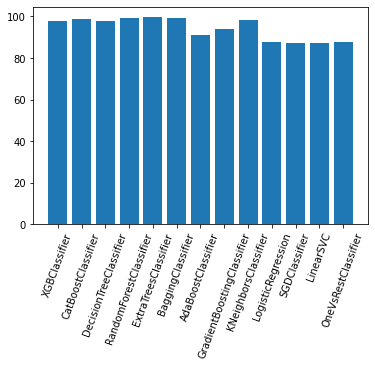

In [ ]:
plt.bar(cls_name, accuracy)
plt.xticks(rotation=70)

# **Google Weighted Word2Vec Vectorization**

In [ ]:
from gensim.models import Word2Vec

w2v_model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)


In [ ]:
class Word2VecVectorizer:
  def __init__(self, model):
    print("Loading in word vectors...")
    self.word_vectors = model
    print("Finished loading in word vectors")

  def fit(self, data):
    pass

  def transform(self, data):
    # determine the dimensionality of vectors
    v = self.word_vectors.get_vector('king')
    self.D = v.shape[0]

    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    for sentence in data:
      tokens = sentence.split()
      vecs = []
      m = 0
      for word in tokens:
        try:
          # throws KeyError if word not found
          vec = self.word_vectors.get_vector(word)
          vecs.append(vec)
          m += 1
        except KeyError:
          pass
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    print("Numer of samples with no words found: %s / %s" % (emptycount, len(data)))
    return X


  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (training_data_oversampled['clean_tweet'], training_data_oversampled['label'] , test_size=0.2)

In [ ]:
# Set a word vectorizer
vectorizer = Word2VecVectorizer(w2v_model)
# Get the sentence embeddings for the train dataset
Xtrain = vectorizer.fit_transform(X_train)
# Get the sentence embeddings for the test dataset
Xtest = vectorizer.transform(X_test)


In [ ]:
cls = [#XGBClassifier(random_state=22,learning_rate=0.9),
    
       #CatBoostClassifier(verbose=0),
    
       DecisionTreeClassifier(),

       RandomForestClassifier(n_estimators=200),
       ExtraTreesClassifier(n_estimators=200),
       BaggingClassifier(n_estimators=20),
       AdaBoostClassifier(n_estimators=100),
       GradientBoostingClassifier(n_estimators=200),

       KNeighborsClassifier(),

       LogisticRegression(),
       LogisticRegression(C=1, penalty='l1', solver='liblinear'), #Lasso
       SGDClassifier(),

       
       
       LinearSVC(),
       OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', class_weight='balanced'), max_samples=1.0 / 10))
       ]

cls_name = []

lbl_actual = y_train
i = 0
accuracy = []
for cl in cls:
    if cl.__class__.__name__=="XGBClassifier":
      model = cl.fit(np.array(Xtrain),y_train)
      lbl_pred = model.predict(Xtest)
      a = (100*accuracy_score(lbl_pred, lbl_actual))
      a = round(a,2)
      accuracy.append(a)
      cls_name.append(cl.__class__.__name__)
      print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
      print ( classification_report(lbl_pred, lbl_actual, digits=4))
      i +=1
    else:
      model = cl.fit(Xtrain,y_train)
      lbl_pred = model.predict(Xtest)
      a = (100*accuracy_score(lbl_pred, lbl_actual))
      a = round(a,2)
      accuracy.append(a)
      cls_name.append(cl.__class__.__name__)
      print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
      print ( classification_report(lbl_pred, lbl_actual, digits=4))
      i +=1

In [ ]:
plt.bar(cls_name, accuracy)
plt.xticks(rotation=70)

# **Glove Vectorization**

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_filename='glove.6B.50d.txt'
word2vec_output_file = glove_filename+'.word2vec'
glove2word2vec("/content/drive/MyDrive/Colab Notebooks/glove.6B.50d.txt", word2vec_output_file)
w2v_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).



In [ ]:
class Word2VecVectorizer:
  def __init__(self, model):
    print("Loading in word vectors...")
    self.word_vectors = model
    print("Finished loading in word vectors")

  def fit(self, data):
    pass

  def transform(self, data):
    # determine the dimensionality of vectors
    v = self.word_vectors.get_vector('king')
    self.D = v.shape[0]

    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    for sentence in data:
      tokens = sentence.split()
      vecs = []
      m = 0
      for word in tokens:
        try:
          # throws KeyError if word not found
          vec = self.word_vectors.get_vector(word)
          vecs.append(vec)
          m += 1
        except KeyError:
          pass
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    print("Numer of samples with no words found: %s / %s" % (emptycount, len(data)))
    return X


  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (training_data_oversampled['clean_tweet'], training_data_oversampled['label'] , test_size=0.2)

In [ ]:
# Set a word vectorizer
vectorizer = Word2VecVectorizer(w2v_model)
# Get the sentence embeddings for the train dataset
Xtrain = vectorizer.fit_transform(X_train)
# Get the sentence embeddings for the test dataset
Xtest = vectorizer.transform(X_test)


Loading in word vectors...
Finished loading in word vectors
Numer of samples with no words found: 164 / 47552
Numer of samples with no words found: 53 / 11888


In [ ]:
cls = [XGBClassifier(random_state=22,learning_rate=0.9),
    
       CatBoostClassifier(verbose=0),
    
       DecisionTreeClassifier(),

       RandomForestClassifier(n_estimators=200),
       ExtraTreesClassifier(n_estimators=200),
       BaggingClassifier(n_estimators=20),
       AdaBoostClassifier(n_estimators=100),
       GradientBoostingClassifier(n_estimators=200),

       KNeighborsClassifier(),

       LogisticRegression(),
       LogisticRegression(C=1, penalty='l1', solver='liblinear'), #Lasso
       SGDClassifier(),

       
       
       LinearSVC(),
       OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', class_weight='balanced'), max_samples=1.0 / 10))
       ]

cls_name = []

lbl_actual = y_test
i = 0
accuracy = []
for cl in cls:
    if cl.__class__.__name__=="XGBClassifier":
      model = cl.fit(np.array(Xtrain),y_train)
      lbl_pred = model.predict(Xtest)
      a = (100*accuracy_score(lbl_pred, lbl_actual))
      a = round(a,2)
      accuracy.append(a)
      cls_name.append(cl.__class__.__name__)
      print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
      print ( classification_report(lbl_pred, lbl_actual, digits=4))
      i +=1
    else:
      model = cl.fit(Xtrain,y_train)
      lbl_pred = model.predict(Xtest)
      a = (100*accuracy_score(lbl_pred, lbl_actual))
      a = round(a,2)
      accuracy.append(a)
      cls_name.append(cl.__class__.__name__)
      print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
      print ( classification_report(lbl_pred, lbl_actual, digits=4))
      i +=1

XGBClassifier  Accuracy Score : 94.64%
              precision    recall  f1-score   support

           0     0.9095    0.9785    0.9427      5359
           1     0.9812    0.9200    0.9496      6529

    accuracy                         0.9464     11888
   macro avg     0.9453    0.9493    0.9462     11888
weighted avg     0.9489    0.9464    0.9465     11888

CatBoostClassifier  Accuracy Score : 97.82%
              precision    recall  f1-score   support

           0     0.9580    0.9969    0.9771      5541
           1     0.9972    0.9619    0.9792      6347

    accuracy                         0.9782     11888
   macro avg     0.9776    0.9794    0.9782     11888
weighted avg     0.9790    0.9782    0.9782     11888

DecisionTreeClassifier  Accuracy Score : 97.33%
              precision    recall  f1-score   support

           0     0.9466    0.9982    0.9717      5468
           1     0.9984    0.9520    0.9746      6420

    accuracy                         0.9733     118

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression  Accuracy Score : 81.04%
              precision    recall  f1-score   support

           0     0.8208    0.7949    0.8077      5954
           1     0.8006    0.8259    0.8130      5934

    accuracy                         0.8104     11888
   macro avg     0.8107    0.8104    0.8104     11888
weighted avg     0.8107    0.8104    0.8104     11888

LogisticRegression  Accuracy Score : 81.24%
              precision    recall  f1-score   support

           0     0.8210    0.7980    0.8094      5932
           1     0.8043    0.8267    0.8154      5956

    accuracy                         0.8124     11888
   macro avg     0.8127    0.8124    0.8124     11888
weighted avg     0.8126    0.8124    0.8124     11888

SGDClassifier  Accuracy Score : 81.45%
              precision    recall  f1-score   support

           0     0.7896    0.8211    0.8051      5545
           1     0.8380    0.8088    0.8231      6343

    accuracy                         0.8145     11888
 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

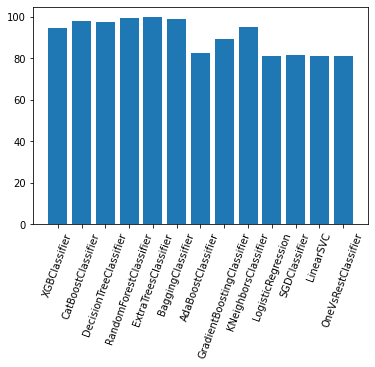

In [ ]:
plt.bar(cls_name, accuracy)
plt.xticks(rotation=70)

# **Gensim FastText (extracting the word embeddings)**

In [ ]:
!pip install --upgrade gensim
import gensim
training_data_oversampled['tokenized'] = training_data_oversampled['clean_tweet'].apply(lambda x: gensim.utils.simple_preprocess(x))
X_train, X_test, y_train, y_test = train_test_split (training_data_oversampled['tokenized'], training_data_oversampled['label'] , test_size=0.2)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 4.1.2
    Uninstalling gensim-4.1.2:
      Successfully uninstalled gensim-4.1.2


In [ ]:
from gensim.models import FastText
from gensim.test.utils import common_texts

model=FastText(sentences=X_train, epochs=100)

In [ ]:
words = set(model.wv.index_to_key )
X_train_vect = np.array([np.array([model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([model.wv[i] for i in ls if i in words])
                         for ls in X_test])
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
cls = [XGBClassifier(random_state=22,learning_rate=0.9),
    
       CatBoostClassifier(verbose=0),
    
       DecisionTreeClassifier(),

       RandomForestClassifier(n_estimators=200),
       ExtraTreesClassifier(n_estimators=200),
       BaggingClassifier(n_estimators=20),
       AdaBoostClassifier(n_estimators=100),
       GradientBoostingClassifier(n_estimators=200),

       KNeighborsClassifier(),

       LogisticRegression(),
       LogisticRegression(C=1, penalty='l1', solver='liblinear'), #Lasso
       SGDClassifier(),

       
       
       LinearSVC(),
       OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', class_weight='balanced'), max_samples=1.0 / 10))
       ]

cls_name = []

lbl_actual = y_test
i = 0
accuracy = []
for cl in cls:
    if cl.__class__.__name__=="XGBClassifier":
      model = cl.fit(np.array(X_train_vect_avg),y_train.values.ravel())
      lbl_pred = model.predict(X_test_vect_avg)
      a = (100*accuracy_score(lbl_pred, lbl_actual))
      a = round(a,2)
      accuracy.append(a)
      cls_name.append(cl.__class__.__name__)
      print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
      print ( classification_report(lbl_pred, lbl_actual, digits=4))
      i +=1
    else:
      model = cl.fit(X_train_vect_avg,y_train.values.ravel())
      lbl_pred = model.predict(X_test_vect_avg)
      a = (100*accuracy_score(lbl_pred, lbl_actual))
      a = round(a,2)
      accuracy.append(a)
      cls_name.append(cl.__class__.__name__)
      print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
      print ( classification_report(lbl_pred, lbl_actual, digits=4))
      i +=1

XGBClassifier  Accuracy Score : 98.01%
              precision    recall  f1-score   support

           0     0.9620    0.9983    0.9798      5730
           1     0.9983    0.9633    0.9805      6158

    accuracy                         0.9801     11888
   macro avg     0.9802    0.9808    0.9801     11888
weighted avg     0.9808    0.9801    0.9802     11888

CatBoostClassifier  Accuracy Score : 98.91%
              precision    recall  f1-score   support

           0     0.9788    0.9993    0.9890      5824
           1     0.9993    0.9792    0.9892      6064

    accuracy                         0.9891     11888
   macro avg     0.9891    0.9893    0.9891     11888
weighted avg     0.9893    0.9891    0.9891     11888

DecisionTreeClassifier  Accuracy Score : 98.0%
              precision    recall  f1-score   support

           0     0.9606    0.9993    0.9796      5716
           1     0.9993    0.9621    0.9804      6172

    accuracy                         0.9800     1188

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC  Accuracy Score : 90.13%
              precision    recall  f1-score   support

           0     0.8984    0.9037    0.9011      5911
           1     0.9042    0.8989    0.9016      5977

    accuracy                         0.9013     11888
   macro avg     0.9013    0.9013    0.9013     11888
weighted avg     0.9013    0.9013    0.9013     11888

OneVsRestClassifier  Accuracy Score : 90.19%
              precision    recall  f1-score   support

           0     0.8969    0.9060    0.9015      5886
           1     0.9069    0.8979    0.9024      6002

    accuracy                         0.9019     11888
   macro avg     0.9019    0.9020    0.9019     11888
weighted avg     0.9020    0.9019    0.9019     11888



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

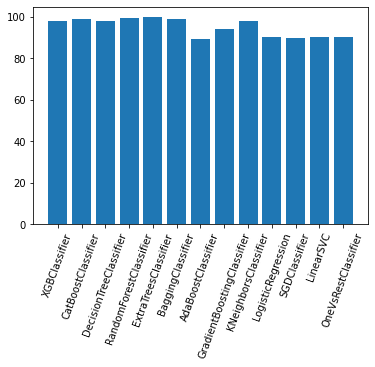

In [ ]:
plt.bar(cls_name, accuracy)
plt.xticks(rotation=70)

# **Facebook FastText Vectorization with Supervised Training**

In [ ]:
data_randomized = training_data_oversampled.sample(frac=1, random_state=1)

# Calculate index for split 80:20 ratio
training_test_index = round(len(data_randomized) * 0.8)

# Split into training and test sets
train_df = data_randomized[:training_test_index].reset_index(drop=True)
test_df = data_randomized[training_test_index:].reset_index(drop=True)


In [ ]:
train_df.iloc[:, 1] = train_df.iloc[:, 1].apply(lambda x: '__label__' + str(x))
test_df.iloc[:, 1] = test_df.iloc[:, 1].apply(lambda x: '__label__' + str(x))

In [ ]:
train_df.head()

,id,label,tweet,clean_tweet,tokenized
0,2716,__label__1,@user and it leads to more violence,lead violence,"[lead, violence]"
1,11723,__label__1,"sadly, those you call your enemies are the maj...",sadly call enemy majority american fascist put...,"[sadly, call, enemy, majority, american, fasci..."
2,23338,__label__0,"""our passion is our strength"" #instagood",passion strength instagood,"[passion, strength, instagood]"
3,13335,__label__0,i am popular. #i_am #positive #affirmation,popular iam positive affirmation,"[popular, iam, positive, affirmation]"
4,6387,__label__0,@user @user @user @user not just men. there a...,men plenty female predator fact,"[men, plenty, female, predator, fact]"


In [ ]:
!pip install fasttext
import csv
import fasttext
train_df[['label', 'clean_tweet']].to_csv('train.txt', 
                                          index = False, 
                                          sep = ' ',
                                          header = None, 
                                          quoting = csv.QUOTE_NONE, 
                                          quotechar = "", 
                                          escapechar = " ")

test_df[['label', 'clean_tweet']].to_csv('test.txt', 
                                     index = False, 
                                     sep = ' ',
                                     header = None, 
                                     quoting = csv.QUOTE_NONE, 
                                     quotechar = "", 
                                     escapechar = " ")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 4.1 MB/s 
  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3165189 sha256=619082d2312b9b1a49af11469b1849cf63b4932b27d57b5bb307b77b78a26ca4
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
X_train, X_test, y_train, y_test = train_test_split (training_data_oversampled['clean_tweet'], training_data_oversampled['label'] , test_size=0.2)

In [ ]:
model = fasttext.train_supervised('train.txt',epoch=100)

In [ ]:
predictions=[]
for line in test_df['clean_tweet']:
    pred_label=model.predict(line)[0][0][9]
    predictions.append(int(pred_label))

    

In [ ]:
y_testt=test_df["label"].tolist()

y_test=[]
for i in range(len(y_testt)):
  y_test.append(int(y_testt[i][9]))


In [ ]:
print (classification_report(predictions, y_test, digits=4))

              precision    recall  f1-score   support

           0     0.9649    0.9986    0.9815      5732
           1     0.9987    0.9662    0.9822      6156

    accuracy                         0.9818     11888
   macro avg     0.9818    0.9824    0.9818     11888
weighted avg     0.9824    0.9818    0.9818     11888



In [ ]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))
    
print_results(*model.test('test.txt'))

N	11888
P@1	0.982
R@1	0.982


# **Facebook FastText Vectorization with Unsupervised Training**

In [ ]:
data_randomized = training_data_oversampled.sample(frac=1, random_state=1)

# Calculate index for split 80:20 ratio
training_test_index = round(len(data_randomized) * 0.8)

# Split into training and test sets
train_df = data_randomized[:training_test_index].reset_index(drop=True)
test_df = data_randomized[training_test_index:].reset_index(drop=True)


In [ ]:
train_df.iloc[:, 1] = train_df.iloc[:, 1].apply(lambda x: '__label__' + str(x))
test_df.iloc[:, 1] = test_df.iloc[:, 1].apply(lambda x: '__label__' + str(x))

In [ ]:
train_df.head()

,id,label,tweet,clean_tweet,tokenized
0,2716,__label__1,@user and it leads to more violence,lead violence,"[lead, violence]"
1,11723,__label__1,"sadly, those you call your enemies are the maj...",sadly call enemy majority american fascist put...,"[sadly, call, enemy, majority, american, fasci..."
2,23338,__label__0,"""our passion is our strength"" #instagood",passion strength instagood,"[passion, strength, instagood]"
3,13335,__label__0,i am popular. #i_am #positive #affirmation,popular iam positive affirmation,"[popular, iam, positive, affirmation]"
4,6387,__label__0,@user @user @user @user not just men. there a...,men plenty female predator fact,"[men, plenty, female, predator, fact]"


In [ ]:
!pip install fasttext
import csv
import fasttext
train_df[['label', 'clean_tweet']].to_csv('train.txt', 
                                          index = False, 
                                          sep = ' ',
                                          header = None, 
                                          quoting = csv.QUOTE_NONE, 
                                          quotechar = "", 
                                          escapechar = " ")

test_df[['label', 'clean_tweet']].to_csv('test.txt', 
                                     index = False, 
                                     sep = ' ',
                                     header = None, 
                                     quoting = csv.QUOTE_NONE, 
                                     quotechar = "", 
                                     escapechar = " ")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train, X_test, y_train, y_test = train_test_split (training_data_oversampled['clean_tweet'], training_data_oversampled['label'] , test_size=0.2)

In [ ]:
model = fasttext.train_unsupervised('train.txt',epoch=100)

# **BERT and Elmo Vectorization**

**Will be implemented in the future.**

# **TEXT CLASSIFICATION WITH NEURAL NETWORKS**

**Will be implemented in the future.**